<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/OSMX_7_custom_filters_infrastructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

In [2]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.2'

In [3]:
place = {"city": "Berkeley", "state": "California"}

# only get motorway ways
cf = '["highway"~"motorway"]'
G = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "motorway")

# only get primary ways
cf = '["highway"~"primary"]'
G = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "primary")

# use the pipe (|) as 'or' operator
cf = '["highway"~"motorway|primary"]'
G = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "motorway + primary")

34 motorway
11 primary
45 motorway + primary


In [4]:
# network of the canals of amsterdam
place = "Amsterdam, Netherlands"
G = ox.graph_from_place(place, custom_filter='["waterway"~"canal"]')

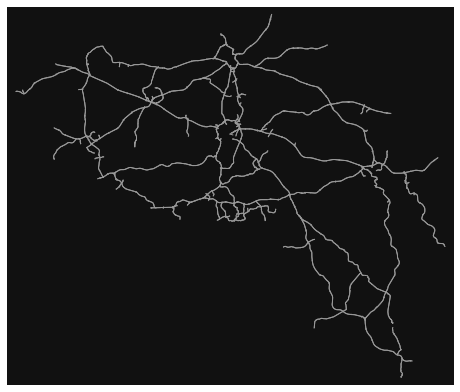

CPU times: user 56.6 s, sys: 2.1 s, total: 58.7 s
Wall time: 11min 56s


In [5]:
%%time
# get only motorways, trunks, and their links in all of Belgium
# takes a couple minutes to do all the downloading and processing
# OSMnx automatically divides up the query into multiple requests to not overload server
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
G = ox.graph_from_place("Belgium", network_type="drive", custom_filter=cf)
fig, ax = ox.plot_graph(G, node_size=0)

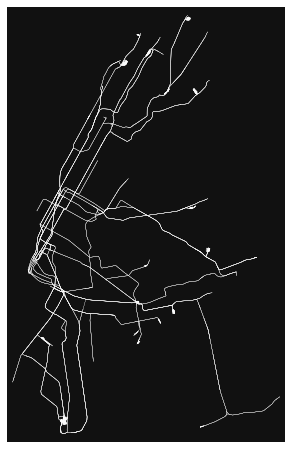

In [6]:
# get NY subway rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should download a station adjacency matrix elsewhere
ox.settings.useful_tags_way += ["railway"]
G = ox.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)